# Dataframe analysis for info & cleaning

- General Analysis
- Cleaning analisys
- Cross crypto analysis


### Cleaning

In [14]:
import sys
sys.path.insert(0, "..")

In [30]:
import pandas as pd
from matplotlib import pyplot
import seaborn as sb

First row as header

In [16]:
df = pd.read_csv('../Datasets/ETH.csv', header=[1])
df

,unix,date,symbol,open,high,low,close,Volume ETH,Volume USDT,tradecount
0,1.640909e+12,2021-12-31 00:00:00,ETH/USDT,3709.27,3734.00,3704.40,3725.46,3249.9985,1.209689e+07,7872.0
1,1.640822e+12,2021-12-30 00:00:00,ETH/USDT,3630.18,3769.10,3585.00,3709.27,249263.7305,9.215378e+08,583361.0
2,1.640736e+12,2021-12-29 00:00:00,ETH/USDT,3792.75,3827.78,3604.20,3630.19,302753.6375,1.136202e+09,719559.0
3,1.640650e+12,2021-12-28 00:00:00,ETH/USDT,4037.22,4037.23,3759.36,3792.75,358064.7163,1.393962e+09,846780.0
4,1.640563e+12,2021-12-27 00:00:00,ETH/USDT,4063.57,4127.46,4031.00,4037.23,222202.1383,9.055884e+08,557284.0
...,...,...,...,...,...,...,...,...,...,...
1594,1.503274e+09,2017-08-21,ETH/USDT,299.10,346.52,294.60,323.29,5134.5400,1.661944e+06,NaN
1595,1.503187e+09,2017-08-20,ETH/USDT,290.91,300.53,282.85,299.10,2469.4900,7.308007e+05,NaN
1596,1.503101e+09,2017-08-19,ETH/USDT,293.96,299.90,278.00,290.91,2140.0800,6.182486e+05,NaN
1597,1.503014e+09,2017-08-18,ETH/USDT,302.00,311.79,283.94,293.96,9392.7900,2.815460e+06,NaN


Drop unnecessary columns

In [17]:
df.drop(columns=['symbol', 'unix', 'Volume USDT'], inplace = True)

Reindex for better plotting

In [18]:
df = df.reindex(index=df.index[::-1])

Nan count

In [19]:
df.isna().sum()

date            0
open            0
high            0
low             0
close           0
Volume ETH      0
tradecount    124
dtype: int64

In [20]:
df = df.dropna()

Date format

In [21]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S')

df

,date,open,high,low,close,Volume ETH,tradecount
1474,2017-12-18,707.62,798.88,638.00,784.00,45673.70777,40460.0
1473,2017-12-19,784.00,864.90,729.01,798.00,69423.62125,57020.0
1472,2017-12-20,798.00,828.00,661.00,790.21,72526.28416,58344.0
1471,2017-12-21,794.62,845.99,705.98,782.41,78222.53998,57627.0
1470,2017-12-22,784.00,796.00,504.99,635.97,154630.49482,113138.0
...,...,...,...,...,...,...,...
4,2021-12-27,4063.57,4127.46,4031.00,4037.23,222202.13830,557284.0
3,2021-12-28,4037.22,4037.23,3759.36,3792.75,358064.71630,846780.0
2,2021-12-29,3792.75,3827.78,3604.20,3630.19,302753.63750,719559.0
1,2021-12-30,3630.18,3769.10,3585.00,3709.27,249263.73050,583361.0


Estadisticos de todas las columnas:

In [22]:
df.describe()

,open,high,low,close,Volume ETH,tradecount
count,1475.000000,1475.000000,1475.000000,1475.000000,1.475000e+03,1.475000e+03
mean,932.229566,967.349980,891.184963,934.280542,5.887681e+05,4.867980e+05
std,1188.567807,1229.420205,1140.396028,1190.794012,5.123289e+05,5.927492e+05
min,83.750000,85.000000,81.790000,83.760000,3.249999e+03,7.872000e+03
25%,187.415000,192.455000,181.470000,187.415000,2.390791e+05,1.244185e+05
50%,352.850000,361.500000,343.070000,352.850000,4.477622e+05,2.127100e+05
75%,1121.040000,1199.925000,1029.630000,1123.950000,7.802902e+05,6.753420e+05
max,4807.980000,4868.000000,4713.890000,4807.980000,4.663240e+06,5.548968e+06


Correlations

<AxesSubplot:>

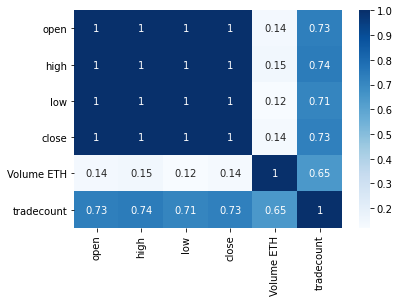

In [34]:
corr = df.corr()
sb.heatmap(corr, cmap="Blues", annot=True)

In [24]:
df['close'].corr(df['Volume ETH'])

0.136916414090545

In [25]:
df['tradecount'].corr(df['Volume ETH'])

0.6462649238443332

Close visualization de todas las criptos

<AxesSubplot:xlabel='date'>

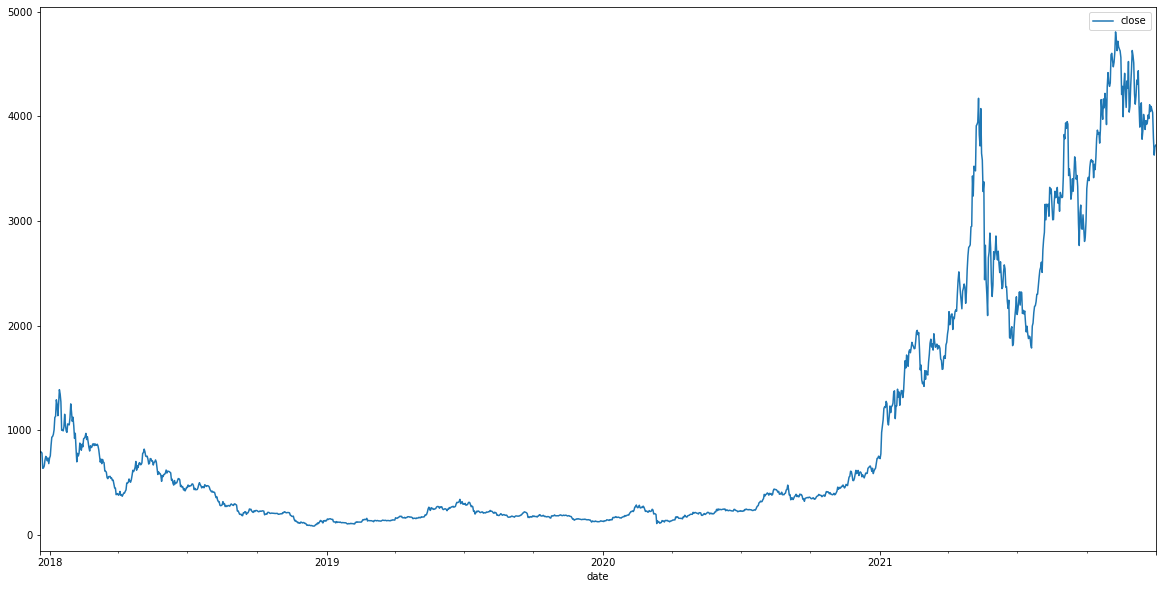

In [26]:
df.plot(x="date", y="close", figsize=(20,10))

## Features visualization and analysis

In [1]:
import sys
sys.path.insert(0, "..")
from data_processing import DataProcessor
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load, clean and extract features for analysis

In [2]:
cryptos = ['BTC', 'ETH', 'ADA', 'LNK', 'LTC']
cryptos = ['BTC']

In [3]:
crypto_df_list = []
for crypto in cryptos:
    processor = DataProcessor([crypto])
    processor.load_data()
    processor.clean_data(crypto)
    processor.feature_extraction(crypto)
    df = processor.get_data(crypto)
    crypto_df_list.append(df)
    display(df.tail(10))

Loading... BTC


,date,open,high,low,close,Volume USDT,tradecount,High Low Difference,Open Close Difference,Close Low High Norm,...,sat,sun,operation,op_buy,op_sell,op_hold,close_diff_5,close_diff_10,close_diff_20,close_diff_50
1609,2022-01-11,41822.49,43100.00,41268.93,42729.29,1.574804e+09,1015526.0,1831.07,906.80,0.797545,...,0,0,hold,0,0,1,-353.02,-4993.36,-5858.87,-13517.89
1610,2022-01-12,42729.29,44322.00,42450.00,43902.66,1.470906e+09,1023902.0,1872.00,1173.37,0.775994,...,0,0,sell,0,1,0,2336.18,-3383.52,-6936.15,-13638.61
1611,2022-01-13,43902.65,44500.00,42311.22,42560.11,1.515945e+09,1036234.0,2188.78,-1342.54,0.113712,...,0,0,hold,0,0,1,880.37,-3885.99,-8259.89,-14578.18
1612,2022-01-14,42558.35,43448.78,41725.95,43059.96,1.392000e+09,946938.0,1722.83,501.61,0.774313,...,0,0,hold,0,0,1,1195.34,-2772.05,-7339.70,-15900.40
1613,2022-01-15,43059.96,43800.00,42555.00,43084.29,9.464883e+08,752688.0,1245.00,24.33,0.425133,...,1,0,hold,0,0,1,1261.80,-366.84,-7691.20,-10642.24
1614,2022-01-16,43084.29,43475.00,42581.79,43071.66,8.872031e+08,732171.0,893.21,-12.63,0.548438,...,0,1,hold,0,0,1,342.37,-10.65,-7629.78,-11649.37
1615,2022-01-17,43071.66,43176.18,41540.42,42201.62,1.169382e+09,918029.0,1635.76,-870.04,0.404216,...,0,0,hold,0,0,1,-1701.04,635.14,-5342.12,-15073.26
1616,2022-01-18,42201.63,42691.00,41250.00,42352.12,1.228460e+09,905061.0,1441.00,150.49,0.764830,...,0,0,hold,0,0,1,-207.99,672.38,-4112.54,-15424.13
1617,2022-01-19,42352.12,42559.13,41138.56,41660.01,1.327478e+09,924528.0,1420.57,-692.11,0.367071,...,0,0,hold,0,0,1,-1399.95,-204.61,-5460.86,-15290.55
1618,2022-01-20,41660.00,41787.75,41639.88,41761.89,1.115819e+07,8918.0,147.87,101.89,0.825117,...,0,0,hold,0,0,1,-1322.40,-60.60,-4455.04,-15422.18


In [39]:
sns.set(rc={'figure.figsize':(5,2.5)})
sns.set_style("whitegrid")

#### Analysis By days

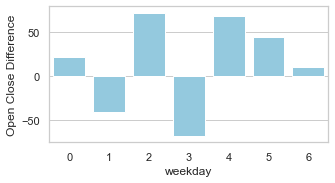

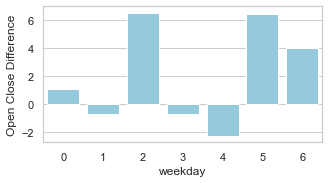

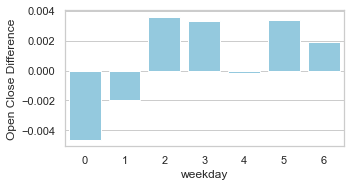

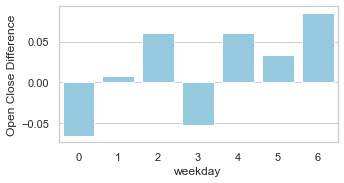

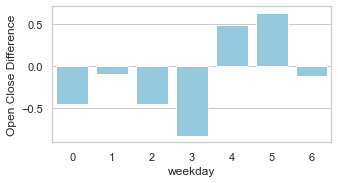

In [25]:
for df in crypto_df_list:
    plt.figure()
    sns.barplot( x=df['weekday'],y=df['Open Close Difference'] , color="skyblue")

#### Analysis by Result

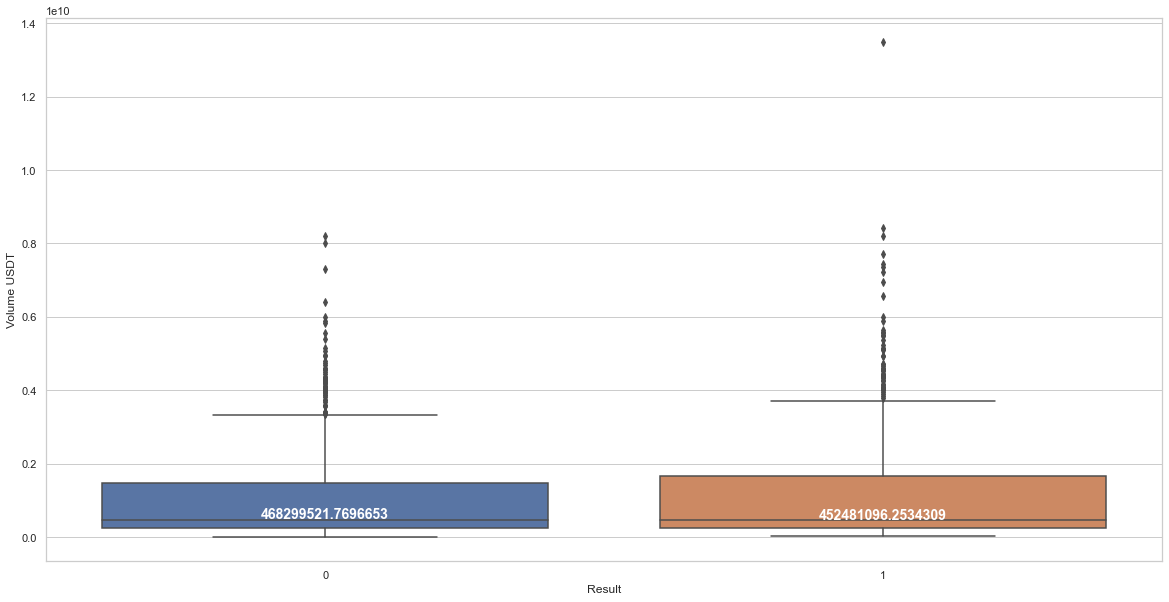

In [11]:

# Basic info

# Extract statistics values divided by result to get information

df_viz = df[['High Low Difference','Open Close Difference','Result', 'Volume USDT']]
box_plot = sns.boxplot(x="Result",y="Volume USDT",data=df_viz)

medians = df_viz.groupby(['Result'])['Volume USDT'].median()
vertical_offset = df_viz['Volume USDT'].median() * 0.05 # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='center',fontsize=14,color='w',weight='semibold')

#### Analysis by close difference

<AxesSubplot:xlabel='date', ylabel='value'>

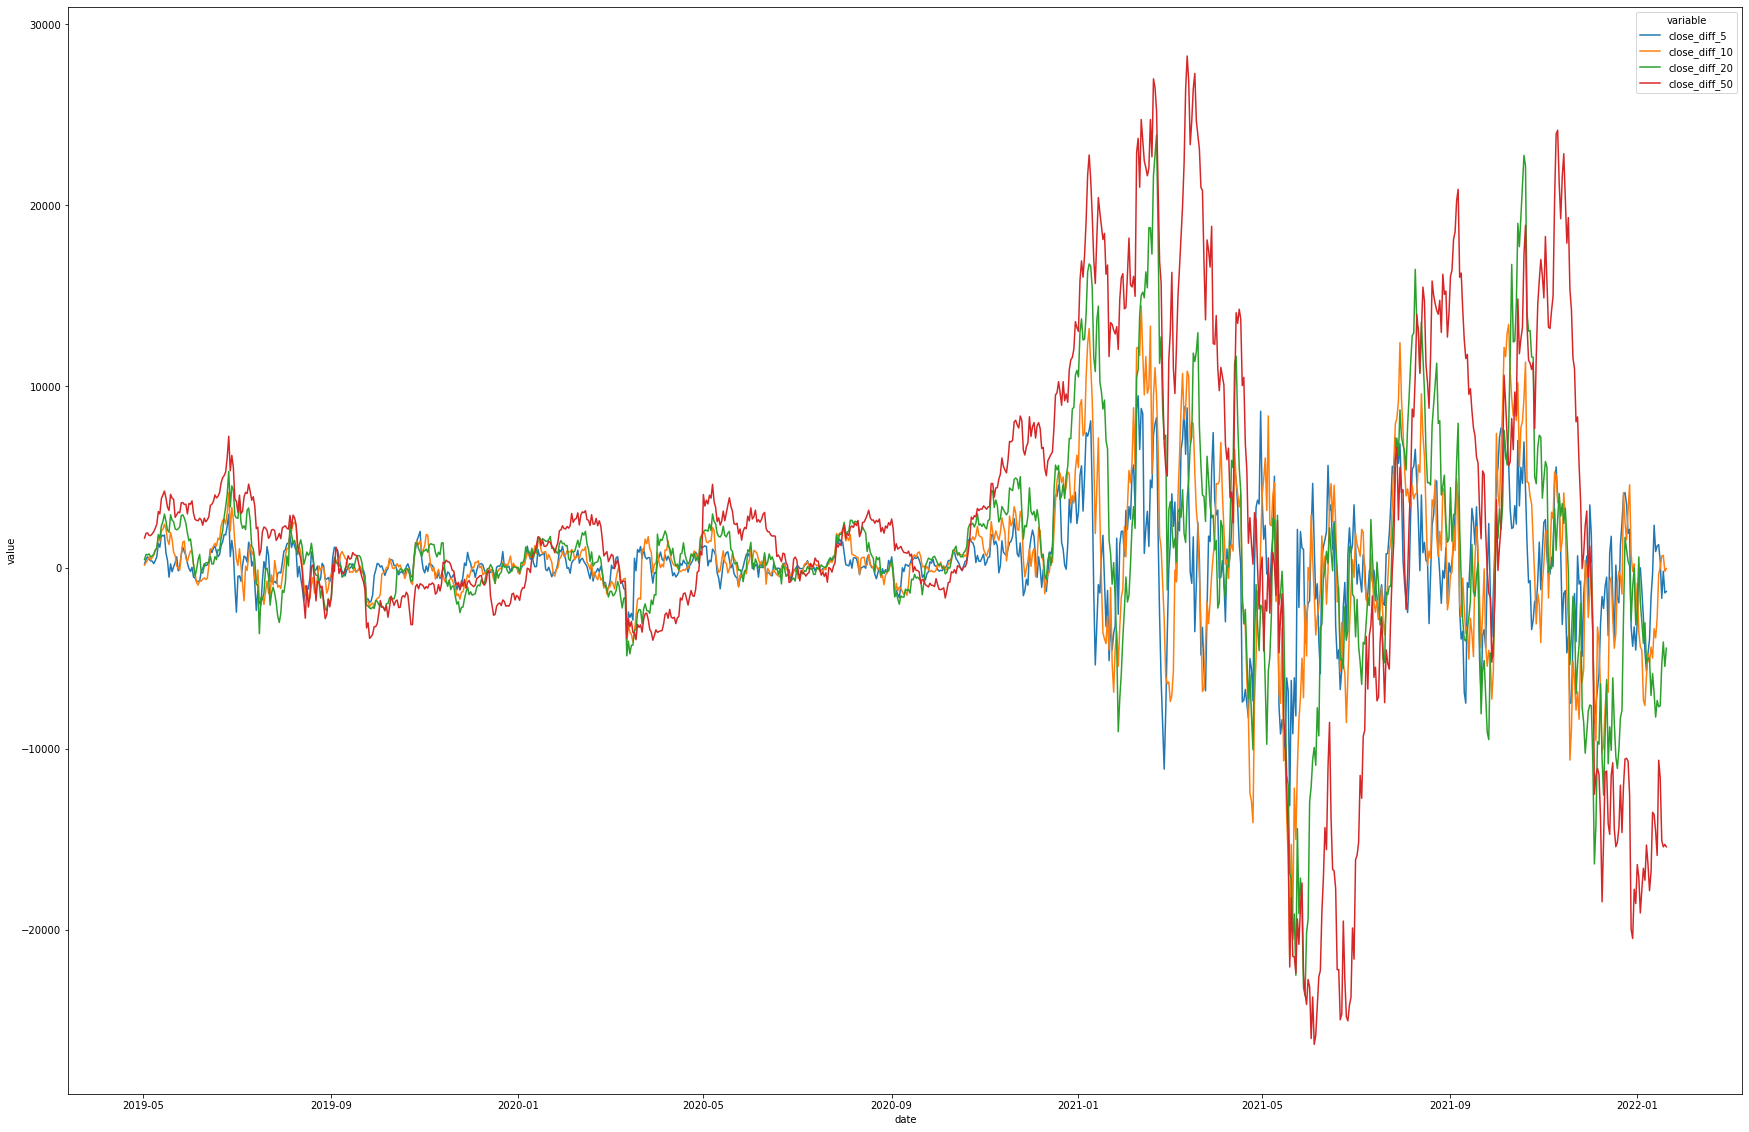

In [34]:
fig, axs = plt.subplots(figsize=(30, 20), nrows=1)

# Basic info
df0 = pd.concat([df['date'], df.iloc[500:,-4:]], join = 'outer', axis = 1)
sns.lineplot(x='date', y='value', hue='variable', data=pd.melt(df0, ['date']))

EMA SMA and close

<AxesSubplot:xlabel='date', ylabel='value'>

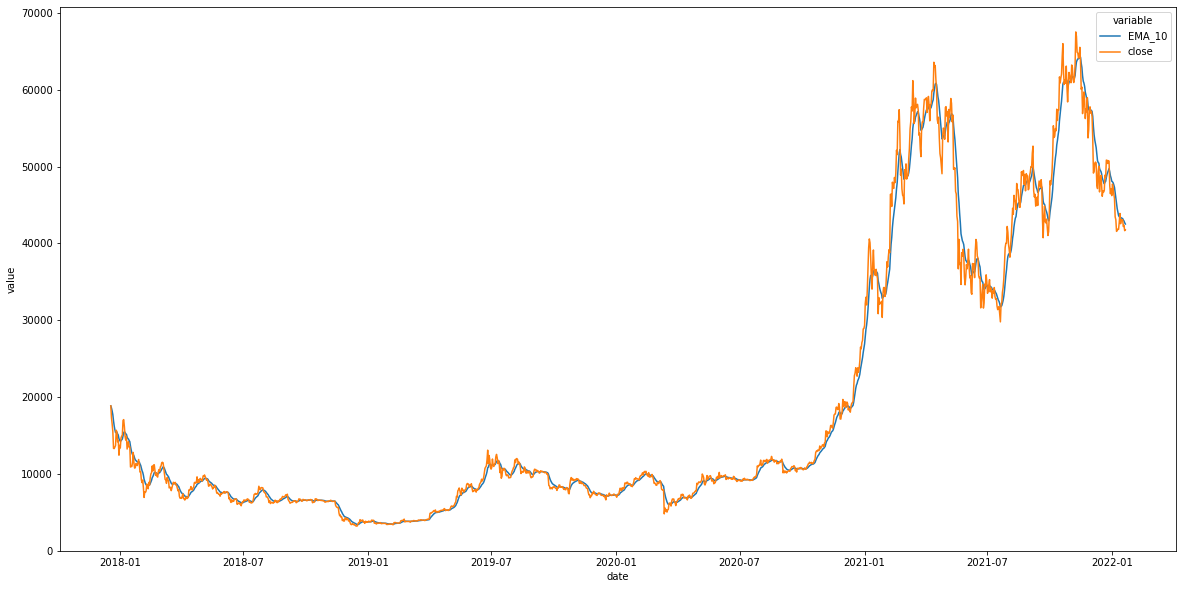

In [4]:
fig, axs = plt.subplots(figsize=(20, 10))
# Basic info
df0 = pd.concat([df['date'], df['EMA_10'], df['close']], join = 'outer', axis = 1)
sns.lineplot(x='date', y='value', hue='variable', data=pd.melt(df0, ['date']))

#### All features visualization

<AxesSubplot:xlabel='date', ylabel='value'>

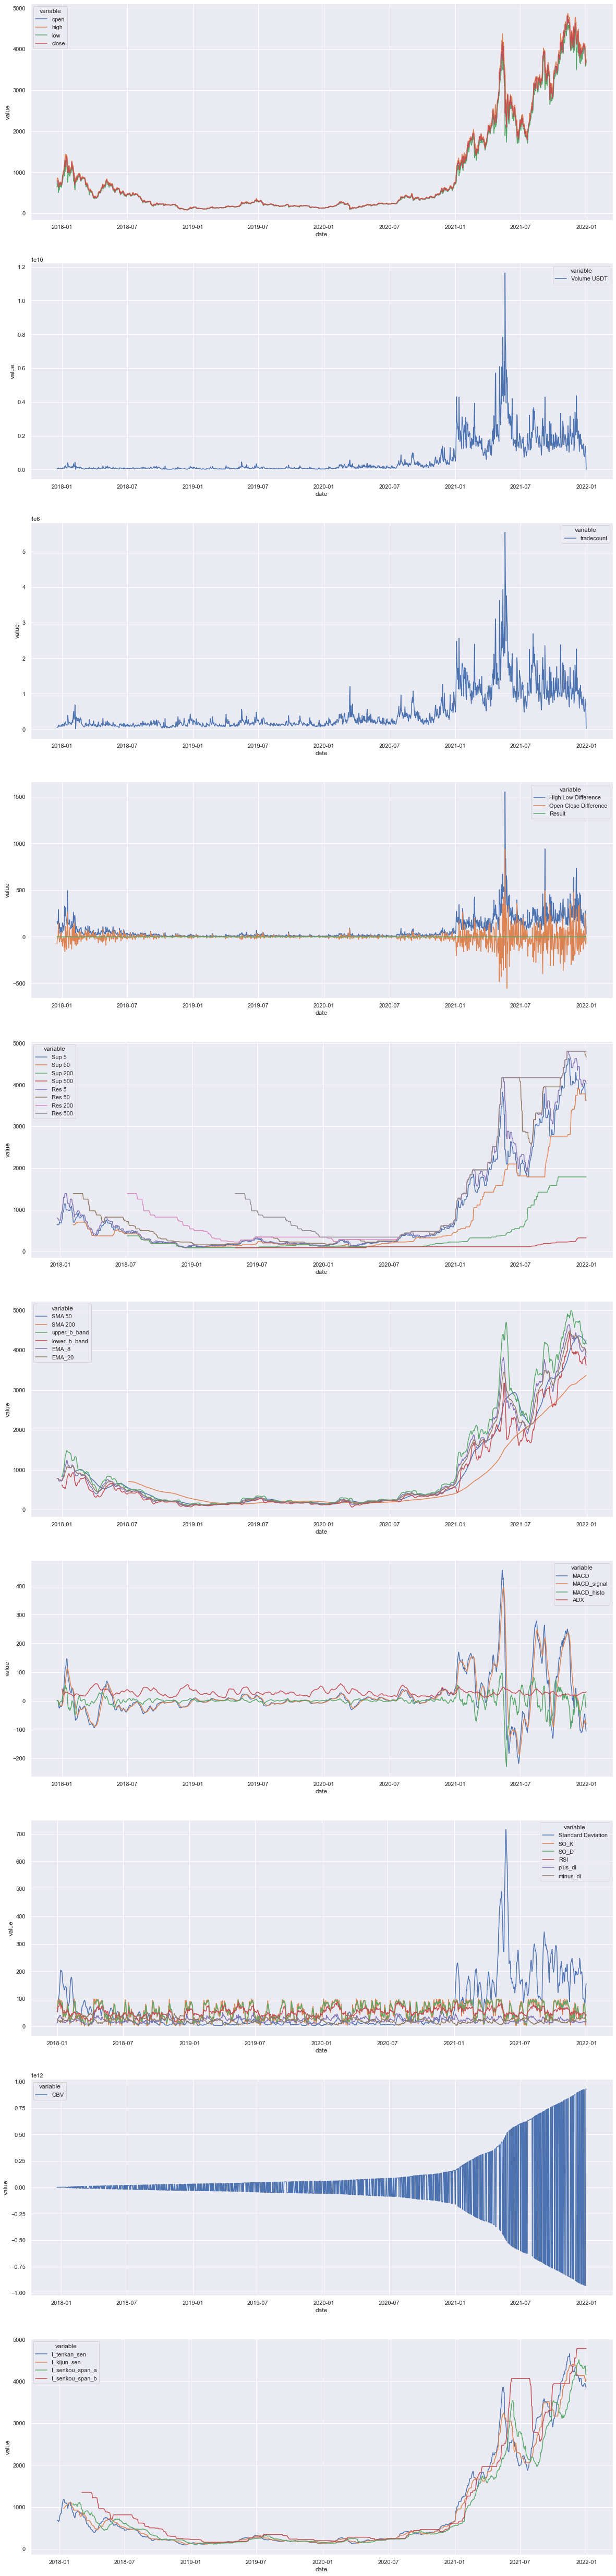

In [4]:


fig, axs = plt.subplots(figsize=(20, 90), nrows=10)

# Basic info
df0 = pd.concat([df['date'], df.iloc[:,1:5]], join = 'outer', axis = 1)
sns.lineplot(x='date', y='value', hue='variable', data=pd.melt(df0, ['date']), ax=axs[0])

# Volume
df1 = pd.concat([df['date'], df.iloc[:,5]], join = 'outer', axis = 1)
sns.lineplot(x='date', y='value', hue='variable', data=pd.melt(df1, ['date']), ax=axs[1])

# Tradecount
df2 = pd.concat([df['date'], df.iloc[:,6]], join = 'outer', axis = 1)
sns.lineplot(x='date', y='value', hue='variable', data=pd.melt(df2, ['date']), ax=axs[2])

# Diff and result
df3 = pd.concat([df['date'], df.iloc[:,7:10]], join = 'outer', axis = 1)
sns.lineplot(x='date', y='value', hue='variable', data=pd.melt(df3, ['date']), ax=axs[3])

# Sup and Res
df4 = pd.concat([df['date'], df.iloc[:,10:18]], join = 'outer', axis = 1)
sns.lineplot(x='date', y='value', hue='variable', data=pd.melt(df4, ['date']), ax=axs[4])

# BB and SMA
df5 = pd.concat([df['date'], df.iloc[:,18:24]], join = 'outer', axis = 1)
sns.lineplot(x='date', y='value', hue='variable', data=pd.melt(df5, ['date']), ax=axs[5])

# MACD, ADX
df6 = pd.concat([df['date'], df.iloc[:,24:28]], join = 'outer', axis = 1)
sns.lineplot(x='date', y='value', hue='variable', data=pd.melt(df6, ['date']), ax=axs[6])

# SO, SD, RSI
df7 = pd.concat([df['date'], df.iloc[:,28:34]], join = 'outer', axis = 1)
sns.lineplot(x='date', y='value', hue='variable', data=pd.melt(df7, ['date']), ax=axs[7])

# OBV
df8 = pd.concat([df['date'], df.iloc[:,34]], join = 'outer', axis = 1)
sns.lineplot(x='date', y='value', hue='variable', data=pd.melt(df8, ['date']), ax=axs[8])

# Ichimoku
df9 = pd.concat([df['date'], df.iloc[:,35:39]], join = 'outer', axis = 1)
sns.lineplot(x='date', y='value', hue='variable', data=pd.melt(df9, ['date']), ax=axs[9])

## Strategies analysis

### Strategy 1 | SMA - SO

<AxesSubplot:xlabel='date', ylabel='value'>

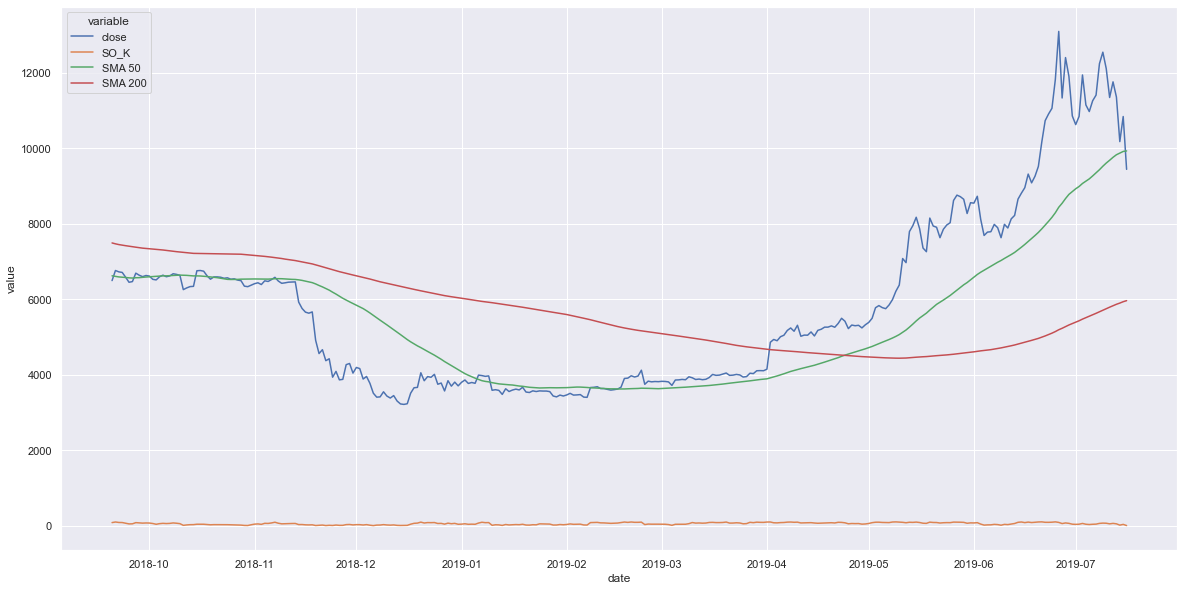

In [9]:
df_viz = df[['date','close','SO_K','SMA 50', 'SMA 200']].iloc[400:700]

# Basic info
sns.lineplot(x='date', y='value', hue='variable', data=pd.melt(df_viz, ['date']))

### Strategy 2 | BB - SO

<AxesSubplot:xlabel='date', ylabel='value'>

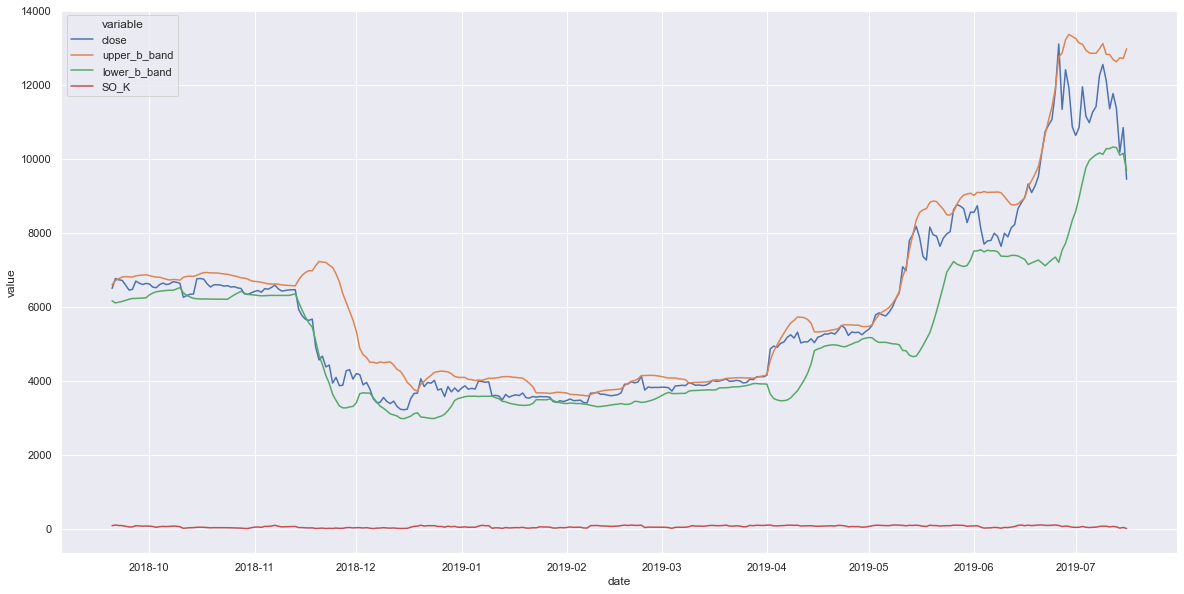

In [11]:
df_viz = df[['date','close', 'upper_b_band','lower_b_band','SO_K']].iloc[400:700]

# Basic info
sns.lineplot(x='date', y='value', hue='variable', data=pd.melt(df_viz, ['date']))

### Strategy 3 | MACD - RSI

<AxesSubplot:xlabel='date', ylabel='value'>

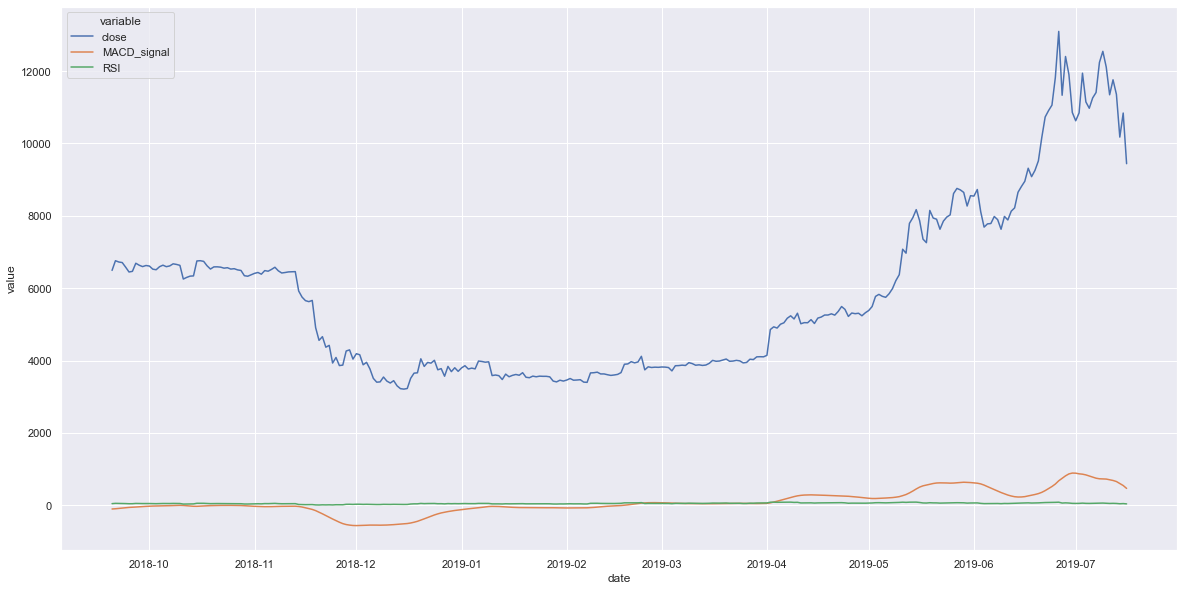

In [14]:
df_viz = df[['date','close', 'MACD_signal','RSI']].iloc[400:700]

# Basic info
sns.lineplot(x='date', y='value', hue='variable', data=pd.melt(df_viz, ['date']))

### Strategy 4 | ADX - BB - RSI

<AxesSubplot:xlabel='date', ylabel='value'>

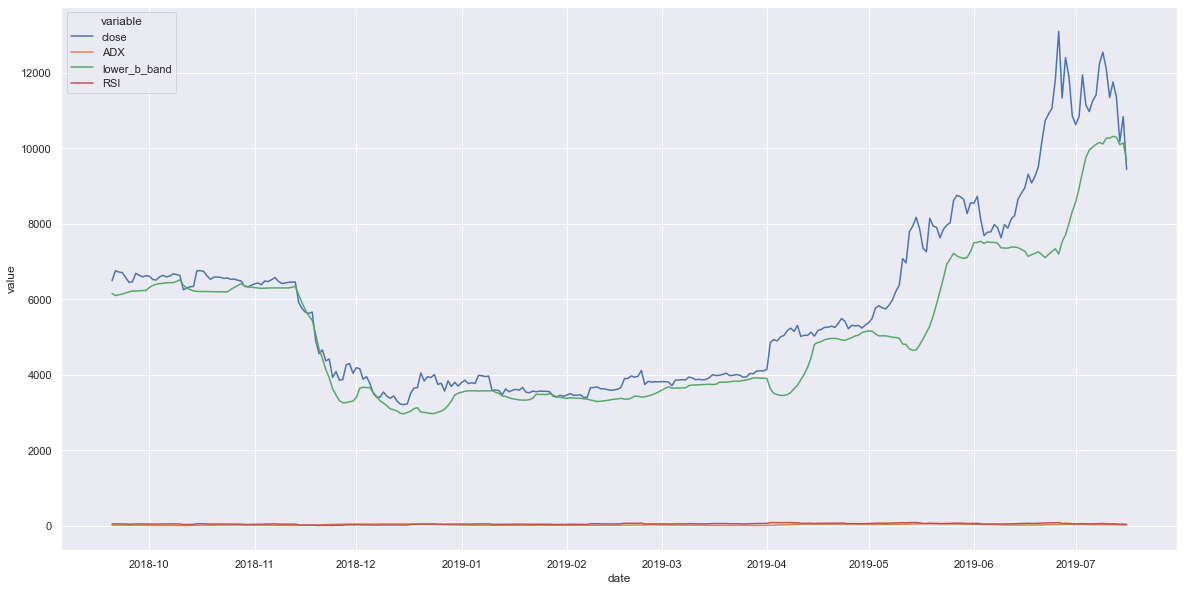

In [15]:
df_viz = df[['date','close', 'ADX','lower_b_band','RSI']].iloc[400:700]

# Basic info
sns.lineplot(x='date', y='value', hue='variable', data=pd.melt(df_viz, ['date']))

### Strategy 5 | MACD

<AxesSubplot:xlabel='date', ylabel='value'>

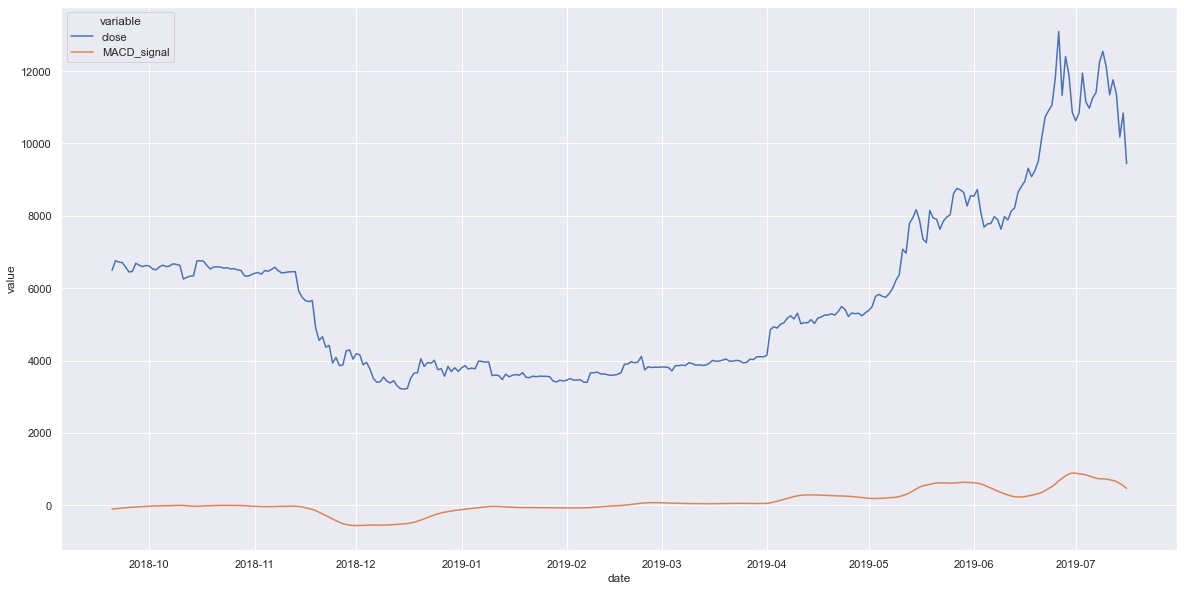

In [16]:
df_viz = df[['date','close', 'MACD_signal']].iloc[400:700]

# Basic info
sns.lineplot(x='date', y='value', hue='variable', data=pd.melt(df_viz, ['date']))

### Strategy 6 | BB

<AxesSubplot:xlabel='date', ylabel='value'>

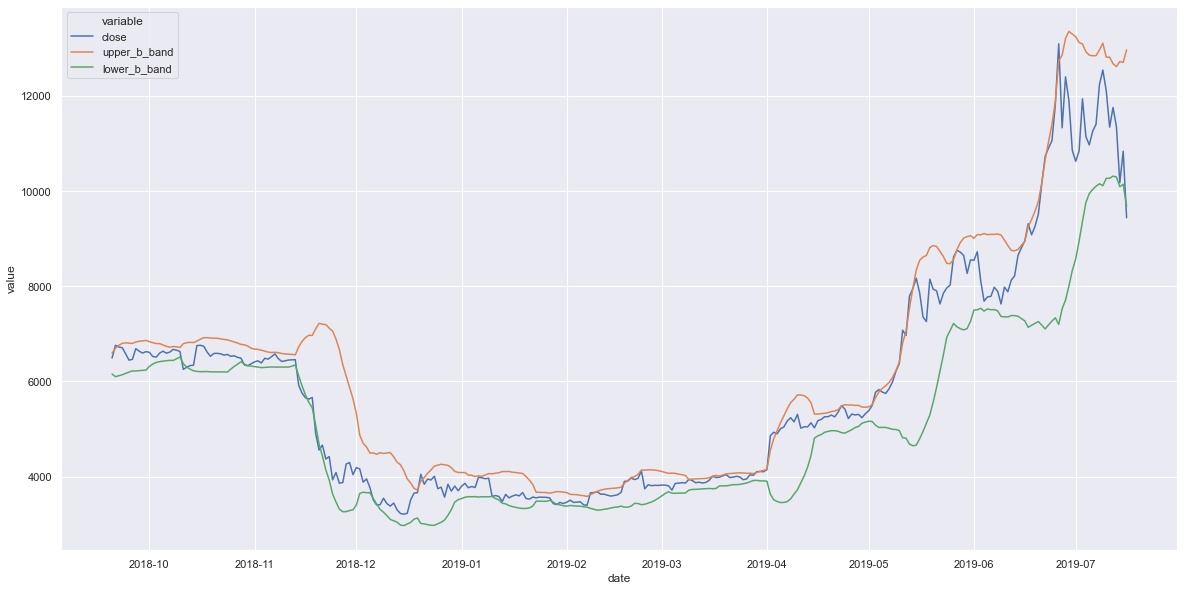

In [17]:
df_viz = df[['date','close', 'upper_b_band','lower_b_band']].iloc[400:700]

# Basic info
sns.lineplot(x='date', y='value', hue='variable', data=pd.melt(df_viz, ['date']))

### Strategy 7 | OBV - RSI - BB

<AxesSubplot:xlabel='date', ylabel='value'>

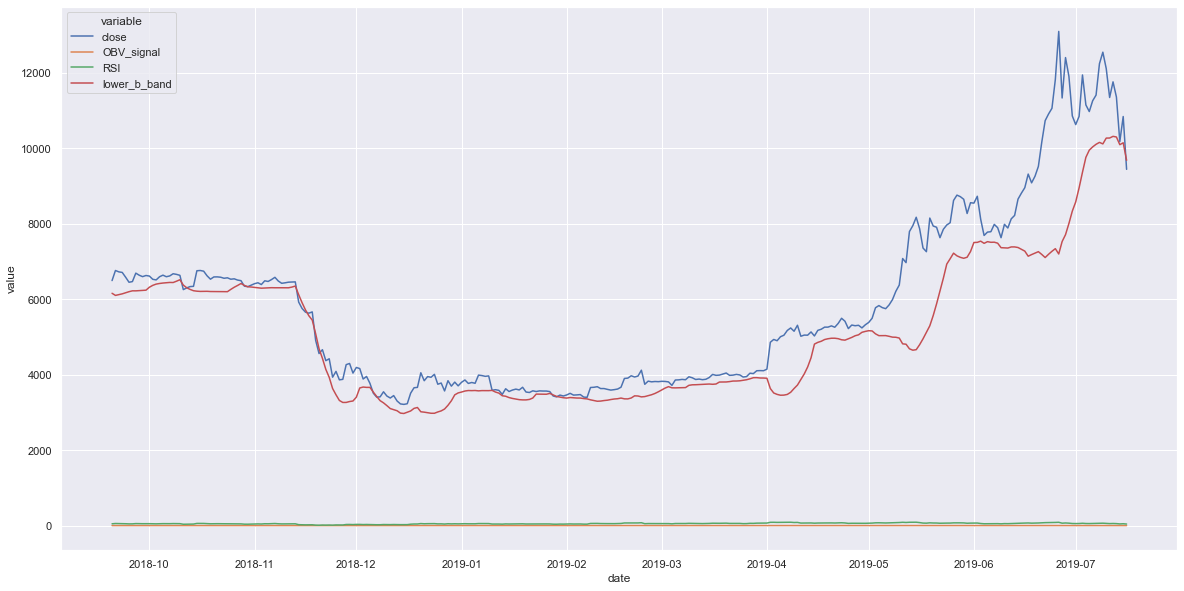

In [18]:
df_viz = df[['date','close', 'OBV_signal','RSI','lower_b_band']].iloc[400:700]

# Basic info
sns.lineplot(x='date', y='value', hue='variable', data=pd.melt(df_viz, ['date']))

### Strategy 8 | Ichimoku

<AxesSubplot:xlabel='date', ylabel='value'>

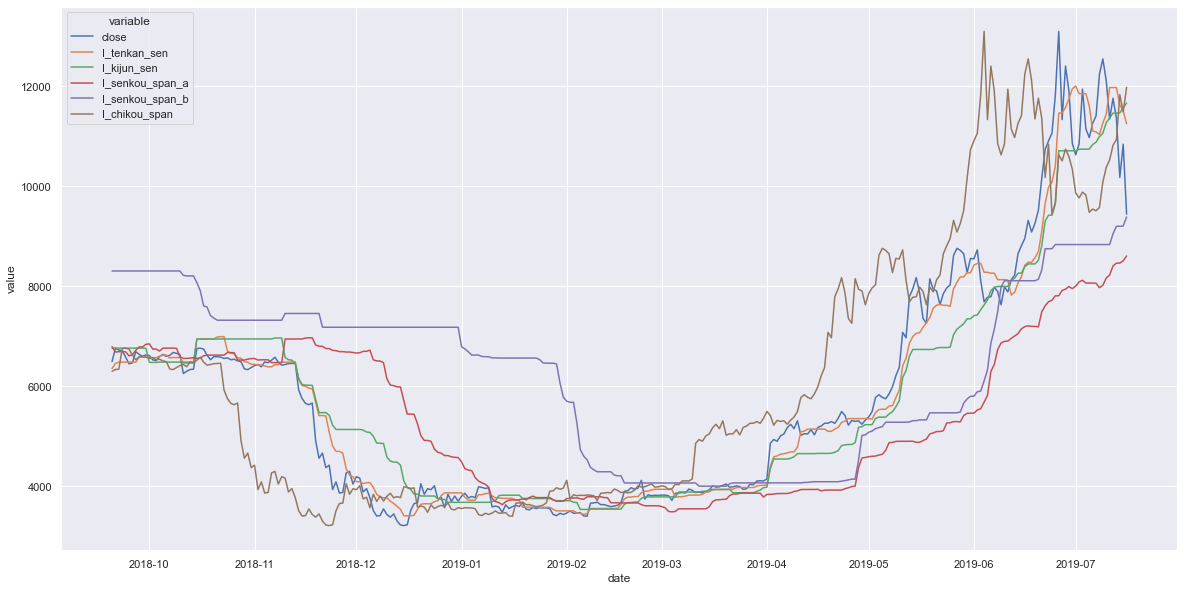

In [20]:
df_viz = df[['date','close', 'I_tenkan_sen','I_kijun_sen','I_senkou_span_a', 'I_senkou_span_b', 'I_chikou_span']].iloc[400:700]

# Basic info
sns.lineplot(x='date', y='value', hue='variable', data=pd.melt(df_viz, ['date']))